In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/varunsatheesh/Desktop/Trancend Files/f1 databases/finalma3.csv')


In [4]:
df

,id,Year,DriverID,Laptime1,Circuit_ID
0,1,2009,1,89.9,14
1,2,2009,1,86.5,14
2,3,2009,1,86.4,14
3,4,2009,1,85.7,14
4,5,2009,1,85.8,14
5,6,2009,1,85.4,14
6,7,2009,1,85.2,14
7,8,2009,1,85.4,14
8,9,2009,1,85.3,14
9,10,2009,1,85.5,14


In [16]:
dataset = df.values


In [17]:
dataset


array([[1.00000e+00, 2.00900e+03, 1.00000e+00, 8.99000e+01, 1.40000e+01],
       [2.00000e+00, 2.00900e+03, 1.00000e+00, 8.65000e+01, 1.40000e+01],
       [3.00000e+00, 2.00900e+03, 1.00000e+00, 8.64000e+01, 1.40000e+01],
       ...,
       [1.48569e+05, 1.99600e+03, 2.10000e+01, 1.01800e+02, 1.00000e+00],
       [1.48570e+05, 1.99600e+03, 2.10000e+01, 1.00200e+02, 1.00000e+00],
       [1.48571e+05, 1.99600e+03, 2.10000e+01, 1.01600e+02, 1.00000e+00]])

In [18]:
X = dataset[:,[1,2,4]]
Y = dataset[:,3]

In [19]:
print(X)

[[2.009e+03 1.000e+00 1.400e+01]
 [2.009e+03 1.000e+00 1.400e+01]
 [2.009e+03 1.000e+00 1.400e+01]
 ...
 [1.996e+03 2.100e+01 1.000e+00]
 [1.996e+03 2.100e+01 1.000e+00]
 [1.996e+03 2.100e+01 1.000e+00]]


In [38]:
print(Y)

[ 89.9  86.5  86.4 ... 101.8 100.2 101.6]


In [20]:
from sklearn import preprocessing


In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [22]:
X_scale

array([[0.52      , 0.        , 1.        ],
       [0.52      , 0.        , 1.        ],
       [0.52      , 0.        , 1.        ],
       ...,
       [0.        , 0.02344666, 0.        ],
       [0.        , 0.02344666, 0.        ],
       [0.        , 0.02344666, 0.        ]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)



In [25]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [26]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(103999, 3) (22286, 3) (22286, 3) (103999,) (22286,) (22286,)


In [27]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [29]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 103999 samples, validate on 22286 samples
Epoch 1/100
103999/103999 [==============================] - 3s 33us/step - loss: -1500.3149 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 2/100
103999/103999 [==============================] - 3s 30us/step - loss: -1501.0928 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 3/100
103999/103999 [==============================] - 3s 30us/step - loss: -1501.0928 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 4/100
103999/103999 [==============================] - 3s 30us/step - loss: -1501.0928 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 5/100
103999/103999 [==============================] - 3s 30us/step - loss: -1501.0928 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 6/100
103999/103999 [==============================] - 3s 30us/step - loss: -1501.0928 - acc: 0.0000e+00 - val_loss: -1503.0858 - val_acc: 0.0000e+00
Epoch 7/100
1

In [32]:
model.evaluate(X_test, Y_test)[1]

22286/22286 [==============================] - 0s 12us/step


0.0

In [33]:
import matplotlib.pyplot as plt

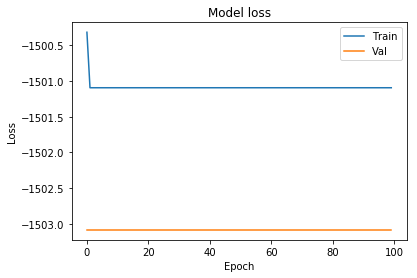

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

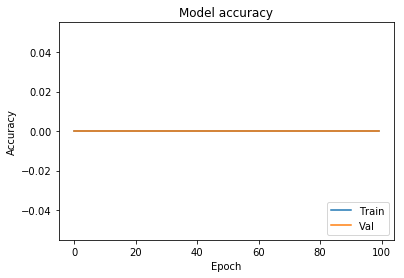

In [35]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [37]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(3,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 103999 samples, validate on 22286 samples
Epoch 1/100
 34272/103999 [========>.....................] - ETA: 5:26 - loss: -1491.8122 - acc: 0.0000e+00

KeyboardInterrupt: 

In [31]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

NameError: name 'plt' is not defined

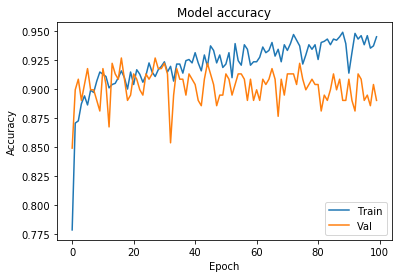

In [26]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
from keras.layers import Dropout
from keras import regularizers

In [30]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [31]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 6s 6ms/step - loss: 14.3649 - acc: 0.6360 - val_loss: 3.9195 - val_acc: 0.7763
Epoch 2/100
1022/1022 [==============================] - 5s 5ms/step - loss: 1.6761 - acc: 0.8483 - val_loss: 0.7014 - val_acc: 0.8402
Epoch 3/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.5674 - acc: 0.8611 - val_loss: 0.4732 - val_acc: 0.8584
Epoch 4/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.5187 - acc: 0.8591 - val_loss: 0.4728 - val_acc: 0.8813
Epoch 5/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4897 - acc: 0.8689 - val_loss: 0.4341 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4705 - acc: 0.8777 - val_loss: 0.4617 - val_acc: 0.8858
Epoch 7/100
1022/1022 [==============================] - 6s 5ms/step - loss: 0.4913 - acc: 0.8738 - val_loss: 0.4524 - val_acc: 0.8721
Epoch 8

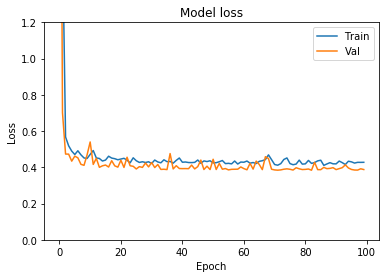

In [32]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

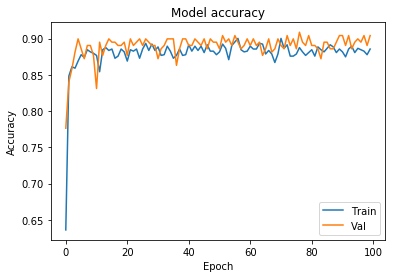

In [33]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()